### EDA (Exploratory Data Analysis).
* Accidentes Aereos.



#### Aspectos minimos a realizar.
*  Búsqueda de valores faltantes.
*  Valores atípicos.
*  Extremos u outliers.
*  Registros duplicados.
*  La utilización de gráficos coherentes según la tipología de variable que corresponda.

#### Importación de librerías.

In [1]:
%matplotlib inline
%store -r
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy
import copy 
import json
from scipy import stats
from scipy.stats import skew
from math import sqrt
from numpy import mean, var
from sklearn import preprocessing
from datetime import datetime

#### Importacion de mi variable.
* Imporatnado la variable donde se genero un DtaFrame para la depuración de los datos.
* Instanciando la variable importada.
* Observando mi DataFrame.
* Observando las columnas en una tabla.

In [2]:
# Imporatnado la variable donde se genero un DtaFrame para la depuración de los datos.
df_AccidentesA

,date,time,location,airline_operator,flight_no,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,summary,country,surface,category,brand,surviving_crew,survivors
0,1908-09-17,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,,Demonstration,Wright Flyer III,2.0,1.0,1.0,1,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",United States,ground,military,Wright Brothers,1.0,1.0
1,1909-09-07,17:18:00,"Juvisy-sur-Orge, France",,,Air show,Wright Byplane,1.0,0.0,1.0,1,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...,France,ground,non-military,Wright Brothers,1.0,0.0
2,1912-07-12,06:30:00,"Atlantic City, New Jersey",Military - U.S. Navy,,Test flight,Dirigible,5.0,0.0,5.0,5,0.0,5.0,First U.S. dirigible Akron exploded just offsh...,United States,ground,military,other,0.0,0.0
3,1913-08-06,06:30:00,"Victoria, British Columbia, Canada",Private,,,Curtiss seaplane,1.0,0.0,1.0,1,0.0,1.0,The first fatal airplane accident in Canada oc...,Canada,ground,non-military,other,0.0,0.0
6,1915-03-05,01:00:00,"Tienen, Belgium",Military - German Navy,,,Zeppelin L-8 (airship),41.0,0.0,41.0,17,0.0,17.0,Crashed into trees while attempting to land af...,Belgium,ground,military,other,24.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5002,2021-03-02,17:05:00,"Pieri, Sudan",South Sudan Supreme Airlines,,Pieri - Yuai,Let L-410UVP-E,10.0,8.0,2.0,10,8.0,2.0,One of the engines on the aircraft failed 10 m...,Sudan,ground,non-military,other,0.0,0.0
5003,2021-03-28,18:35:00,"Near Butte, Alaska",Soloy Helicopters,,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,6.0,5.0,1.0,5,4.0,1.0,The sightseeing helicopter crashed after missi...,United States,ground,non-military,other,0.0,1.0
5004,2021-05-21,18:00:00,"Near Kaduna, Nigeria",Military - Nigerian Air Force,,,Beechcraft B300 King Air 350i,11.0,7.0,4.0,11,7.0,4.0,"While on final approach, in poor weather condi...",Nigeria,ground,military,Beechcraft,0.0,0.0
5005,2021-06-10,08:00:00,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,,Naypyidaw - Anisakan,Beechcraft 1900D,14.0,12.0,2.0,12,11.0,1.0,The plane was carrying military personnel and ...,Myanmar,ground,military,Beechcraft,1.0,2.0


In [3]:
# Instanciando la variable importada.
df_EDA = df_AccidentesA

In [4]:
# Observando mi DataFrame.
df_EDA

,date,time,location,airline_operator,flight_no,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,summary,country,surface,category,brand,surviving_crew,survivors
0,1908-09-17,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,,Demonstration,Wright Flyer III,2.0,1.0,1.0,1,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",United States,ground,military,Wright Brothers,1.0,1.0
1,1909-09-07,17:18:00,"Juvisy-sur-Orge, France",,,Air show,Wright Byplane,1.0,0.0,1.0,1,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...,France,ground,non-military,Wright Brothers,1.0,0.0
2,1912-07-12,06:30:00,"Atlantic City, New Jersey",Military - U.S. Navy,,Test flight,Dirigible,5.0,0.0,5.0,5,0.0,5.0,First U.S. dirigible Akron exploded just offsh...,United States,ground,military,other,0.0,0.0
3,1913-08-06,06:30:00,"Victoria, British Columbia, Canada",Private,,,Curtiss seaplane,1.0,0.0,1.0,1,0.0,1.0,The first fatal airplane accident in Canada oc...,Canada,ground,non-military,other,0.0,0.0
6,1915-03-05,01:00:00,"Tienen, Belgium",Military - German Navy,,,Zeppelin L-8 (airship),41.0,0.0,41.0,17,0.0,17.0,Crashed into trees while attempting to land af...,Belgium,ground,military,other,24.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5002,2021-03-02,17:05:00,"Pieri, Sudan",South Sudan Supreme Airlines,,Pieri - Yuai,Let L-410UVP-E,10.0,8.0,2.0,10,8.0,2.0,One of the engines on the aircraft failed 10 m...,Sudan,ground,non-military,other,0.0,0.0
5003,2021-03-28,18:35:00,"Near Butte, Alaska",Soloy Helicopters,,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,6.0,5.0,1.0,5,4.0,1.0,The sightseeing helicopter crashed after missi...,United States,ground,non-military,other,0.0,1.0
5004,2021-05-21,18:00:00,"Near Kaduna, Nigeria",Military - Nigerian Air Force,,,Beechcraft B300 King Air 350i,11.0,7.0,4.0,11,7.0,4.0,"While on final approach, in poor weather condi...",Nigeria,ground,military,Beechcraft,0.0,0.0
5005,2021-06-10,08:00:00,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,,Naypyidaw - Anisakan,Beechcraft 1900D,14.0,12.0,2.0,12,11.0,1.0,The plane was carrying military personnel and ...,Myanmar,ground,military,Beechcraft,1.0,2.0


In [5]:
# Observando las columnas en una tabla.
pd.DataFrame(df_EDA.columns)

,0
0,date
1,time
2,location
3,airline_operator
4,flight_no
5,route
6,aircraft_type
7,total_aboard
8,passengers_aboard
9,crew_aboard


In [6]:
df_EDA = df_EDA

#### Tratamiento de valores duplicados.
* Buscamos filas con valores duplicados.
  * Observamos que no hay duplicados.

In [7]:
# Buscamos filas con valores duplicados
duplicados = df_EDA[df_EDA.duplicated()] 
duplicados
# Observamos que no hay duplicados.

,date,time,location,airline_operator,flight_no,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,summary,country,surface,category,brand,surviving_crew,survivors


In [8]:
df_EDA = df_EDA

#### Tratamiento de valores nulos.
* Obteniendo la cantidad de valores Nulos en cada columna.
* Porcentajes de los valores Nulos son muy pocos, y mantendremos los valores nulos de dichas columnas para no eliminar registros. 
  * No obstante no usaremos dichas columnas.
* Observamos la dimencion del DataFrame.
* Observamos la dimencion del DataFrame.

In [9]:
# Obteniendo la cantidad de valores Nulos en cada columna.
df_EDA.isna().sum()

date                     0
time                     0
location                 0
airline_operator         0
flight_no                0
route                    0
aircraft_type            0
total_aboard             0
passengers_aboard        3
crew_aboard              0
total_fatalities         0
passengers_fatalities    4
crew_fatalities          0
summary                  0
country                  0
surface                  0
category                 0
brand                    0
surviving_crew           0
survivors                0
dtype: int64

In [10]:
# Porcentajes de los valores Nulos, mantendremos los valores nulos de dichas columnas para no eliminar registros. 
# No obstante no podremos usar dichas columnas.
cuadro = pd.DataFrame(((df_EDA.isna().sum()/df_EDA.shape[0])*100).round(2))
cuadro.columns = ["% de Valores Nulos"]
cuadro

,% de Valores Nulos
date,0.00
time,0.00
location,0.00
airline_operator,0.00
flight_no,0.00
route,0.00
aircraft_type,0.00
total_aboard,0.00
passengers_aboard,0.06
crew_aboard,0.00


In [11]:
# Porcentajes de los valores Nulos, mantendremos los valores nulos de dichas columnas para no eliminar registros. 
# No obstante no podremos usar dichas columnas.

print(f"Porcentaje de nulos en passengers_aboard     es:  {round(df_EDA['passengers_aboard'].isna().sum()*100/df_EDA.shape[0], 2)} %.")
print(f"Porcentaje de nulos en passengers_fatalities es:  {round(df_EDA['passengers_fatalities'].isna().sum()*100/df_EDA.shape[0], 2)} %.")


Porcentaje de nulos en passengers_aboard     es:  0.06 %.
Porcentaje de nulos en passengers_fatalities es:  0.08 %.


In [12]:
# Observamos la dimencion del DataFrame.
df_EDA.shape

(4770, 20)

In [13]:
df_EDA = df_EDA

#### Análisis descriptivo.

#### Medidas descriptivas.
* Obteniendo la cantidad de valores Nulos en cada columna.
* Mostrando como se va visualizando mi DataFrame.
* Obteniendo la descrición estadistica del DataFrame.

In [14]:
# Obteniendo la cantidad de valores Nulos en cada columna.
df_EDA.isna().sum()

date                     0
time                     0
location                 0
airline_operator         0
flight_no                0
route                    0
aircraft_type            0
total_aboard             0
passengers_aboard        3
crew_aboard              0
total_fatalities         0
passengers_fatalities    4
crew_fatalities          0
summary                  0
country                  0
surface                  0
category                 0
brand                    0
surviving_crew           0
survivors                0
dtype: int64

In [15]:
# Mostrando como se va visualizando mi DataFrame.
df_EDA

,date,time,location,airline_operator,flight_no,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,summary,country,surface,category,brand,surviving_crew,survivors
0,1908-09-17,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,,Demonstration,Wright Flyer III,2.0,1.0,1.0,1,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",United States,ground,military,Wright Brothers,1.0,1.0
1,1909-09-07,17:18:00,"Juvisy-sur-Orge, France",,,Air show,Wright Byplane,1.0,0.0,1.0,1,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...,France,ground,non-military,Wright Brothers,1.0,0.0
2,1912-07-12,06:30:00,"Atlantic City, New Jersey",Military - U.S. Navy,,Test flight,Dirigible,5.0,0.0,5.0,5,0.0,5.0,First U.S. dirigible Akron exploded just offsh...,United States,ground,military,other,0.0,0.0
3,1913-08-06,06:30:00,"Victoria, British Columbia, Canada",Private,,,Curtiss seaplane,1.0,0.0,1.0,1,0.0,1.0,The first fatal airplane accident in Canada oc...,Canada,ground,non-military,other,0.0,0.0
6,1915-03-05,01:00:00,"Tienen, Belgium",Military - German Navy,,,Zeppelin L-8 (airship),41.0,0.0,41.0,17,0.0,17.0,Crashed into trees while attempting to land af...,Belgium,ground,military,other,24.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5002,2021-03-02,17:05:00,"Pieri, Sudan",South Sudan Supreme Airlines,,Pieri - Yuai,Let L-410UVP-E,10.0,8.0,2.0,10,8.0,2.0,One of the engines on the aircraft failed 10 m...,Sudan,ground,non-military,other,0.0,0.0
5003,2021-03-28,18:35:00,"Near Butte, Alaska",Soloy Helicopters,,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,6.0,5.0,1.0,5,4.0,1.0,The sightseeing helicopter crashed after missi...,United States,ground,non-military,other,0.0,1.0
5004,2021-05-21,18:00:00,"Near Kaduna, Nigeria",Military - Nigerian Air Force,,,Beechcraft B300 King Air 350i,11.0,7.0,4.0,11,7.0,4.0,"While on final approach, in poor weather condi...",Nigeria,ground,military,Beechcraft,0.0,0.0
5005,2021-06-10,08:00:00,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,,Naypyidaw - Anisakan,Beechcraft 1900D,14.0,12.0,2.0,12,11.0,1.0,The plane was carrying military personnel and ...,Myanmar,ground,military,Beechcraft,1.0,2.0


In [16]:
# Obteniendo la descrición del DataFrame.
df_EDA.describe()

,date,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,surviving_crew,survivors
count,4770,4770.000000,4767.000000,4770.000000,4770.000000,4766.000000,4770.000000,4770.000000,4770.000000
mean,1971-09-17 17:22:24.905660336,31.342558,26.852318,4.517191,22.467925,18.963072,3.589308,0.927883,8.874633
min,1908-09-17 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,0.000000
25%,1951-11-13 12:00:00,6.000000,3.000000,2.000000,4.000000,1.000000,2.000000,0.000000,0.000000
50%,1970-12-06 00:00:00,16.000000,12.000000,4.000000,11.000000,8.000000,3.000000,0.000000,0.000000
75%,1992-07-26 06:00:00,35.000000,30.000000,6.000000,25.000000,21.000000,5.000000,1.000000,3.000000
max,2021-07-06 00:00:00,644.000000,614.000000,83.000000,583.000000,560.000000,43.000000,81.000000,516.000000
std,NaN,46.113066,44.091896,3.761976,35.660951,34.084555,3.177243,2.648215,30.895257


In [17]:
df_EDA = df_EDA

#### Histogramas.
* Reaizamos un Histograma con las siguientes columnas: total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,survivors.
  * Todas las distribuciones presentan un gran sesgo a la derecha.

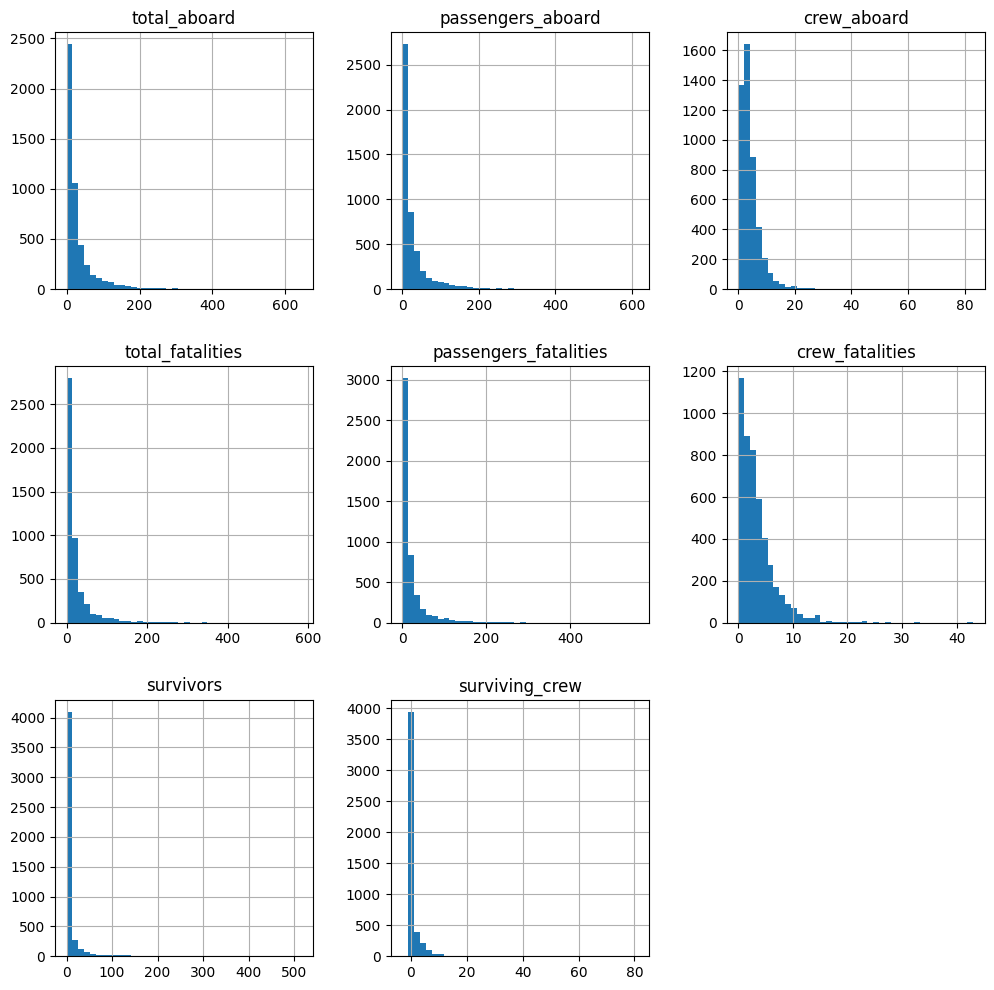

In [18]:
# Reaizamos un Histograma con las siguientes columnas: total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,survivors.
# Todas las distribuciones presentan un gran sesgo a la derecha. Moda, Mediana, Media.
columns = ['total_aboard', 'passengers_aboard', 'crew_aboard', 'total_fatalities', 'passengers_fatalities', 'crew_fatalities', 'survivors', 'surviving_crew']
df_EDA[columns].hist(bins=40, figsize= (12, 12))
plt.savefig(r'C:\Users\ingju\Desktop\proyect02\src\histoGram1', dpi=50)
plt.show()

In [19]:
df_EDA = df_EDA

#### Outliers.
* Graficamos las siguientes variables que podemos utilizar (ya que no tienen valores nulos).
* Filtramos outliers de crew_aboard.
* Criterio de selección.
* Filtramos outliers de crew_fatalities.
* Criterio de selección crew_fatalities.
* Criterio de selección, si crew_aboard > crew.fatalities.


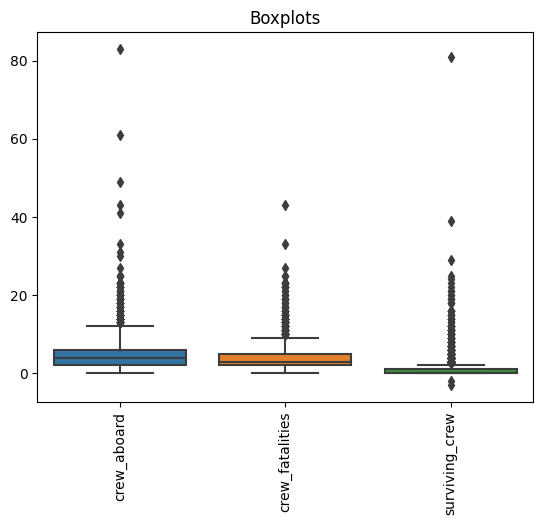

In [20]:
# Graficamos las siguientes variables que podemos utilizar (ya que no tienen valores nulos).
# Observamos outliers en crew_aboard, crew_fatalities, surviving_crew.
# Outliers en crew_aboard y crew_fatalities, muestran datos iguales lo que significa que la tripulacion abordo, en su totalidad fallecio.
# En el Outliers suviving, muestra datos distintos a los dos primeros Outliers, y esto es logico porque son los sobrevivientes de la tripulacion.

sns.boxplot(data=df_EDA[['crew_aboard', 'crew_fatalities', 'surviving_crew']])
plt.title('Boxplots')
plt.xticks(rotation=90)
plt.savefig(r'C:\Users\ingju\Desktop\proyect02\src\outliers1', dpi=50)
plt.show()

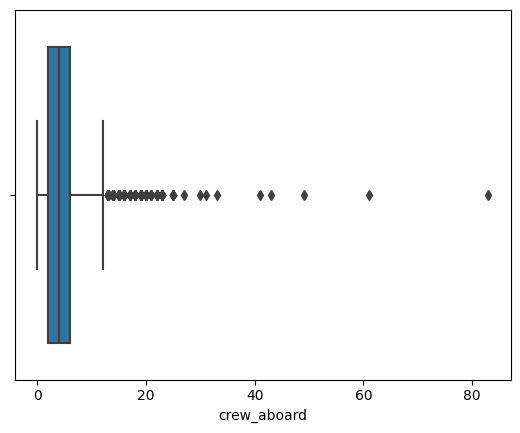

El rango intercuartil (IQR) de total_aboard es 4.0
-4.0 12.0


,date,time,location,airline_operator,flight_no,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,summary,country,surface,category,brand,surviving_crew,survivors
6,1915-03-05,01:00:00,"Tienen, Belgium",Military - German Navy,,,Zeppelin L-8 (airship),41.0,0.0,41.0,17,0.0,17.0,Crashed into trees while attempting to land af...,Belgium,ground,military,other,24.0,24.0
10,1916-10-01,23:45:00,"Potters Bar, England",Military - German Navy,,,Zeppelin L-31 (airship),19.0,0.0,19.0,19,0.0,19.0,Shot down in flames by the British 39th Home D...,England,ground,military,other,0.0,0.0
60,1921-08-24,17:40:00,"River Humber, England",Military - Royal Airship Works,,,Royal Airship Works ZR-2 (airship),49.0,0.0,49.0,43,0.0,43.0,Crashed due to structural failure followed by ...,England,water,military,other,6.0,6.0
67,1922-04-08,13:15:00,"Pao Ting Fou, China",,,Test,,17.0,0.0,17.0,17,0.0,17.0,Aboard were all workers taking part in a fligh...,China,ground,non-military,other,0.0,0.0
102,1925-09-03,05:30:00,"Caldwell, Ohio",Military - U.S. Navy,,"Lakehurst, NJ - S.t Louis, MO",Dirigible ZR-1 Shenandoah (airship),43.0,0.0,43.0,14,0.0,14.0,The Shenandoah was flying over Southern Ohio w...,United States,ground,military,other,29.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4867,2013-07-06,11:38:00,"San Francisco, California",Asiana Airlines,214,Shanghai - Seoul - San Francisco,Boeing B-777-28EER,307.0,291.0,16.0,3,3.0,0.0,The aircraft crash landed short of the runway ...,United States,ground,non-military,Boeing,16.0,304.0
4895,2014-07-17,16:19:00,"Hrabove, Ukraine",Malaysia Airlines,17,Amsterdam - Kuala Lumpur,Boeing 777-2H6ER,298.0,283.0,15.0,298,283.0,15.0,A Boeing 777-200 airliner operating as Malays...,Ukraine,ground,non-military,Boeing,0.0,0.0
4937,2016-08-05,12:38:00,"Dubai, United Arab Emirates",Emirates,521,"Thiruvanthapuram, India - Dubai, UAE",Boeing 777-31H,300.0,282.0,18.0,0,0.0,0.0,"After being cleared to land, the crew informed...",United Arab Emirates,ground,non-military,Boeing,18.0,300.0
4952,2017-06-07,13:35:00,"Off Dawei, Myanmar",Military - Myanmar Air Force,,Myeik - Yangon,Shaanxi Y-8F-200W,122.0,108.0,14.0,122,108.0,14.0,The transport plane carrying military personne...,Myanmar,ground,military,other,0.0,0.0


In [21]:
# Filtramos outliers de crew_aboard, para apreciar mejor:
# El 25% de nuestros datos inferiorioes a la media. -4.0
# La media que es el 50% de nuestros datos. El rango intercuartil (IQR) de total_aboard es 4.0 entre -4.0  y 12.0
# El otro 25% de nuestors datos que estan por encima de la media. 12.0
sns.boxplot(data = df_EDA, x = 'crew_aboard')
plt.savefig(r'C:\Users\ingju\Desktop\proyect02\src\outliers2', dpi=50)
plt.show()
# IQR
Q1 = np.percentile(df_EDA['crew_aboard'], 25,
                   interpolation = 'midpoint')
Q3 = np.percentile(df_EDA['crew_aboard'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
print(f"El rango intercuartil (IQR) de total_aboard es {IQR}")

lower_lim = Q1 - 1.5*IQR
upper_lim = Q3 + 1.5*IQR
print(lower_lim, upper_lim)

df_EDA[(df_EDA['crew_aboard']<lower_lim) | (df_EDA['crew_aboard']>upper_lim)]

In [22]:
# Criterio de selección.

df_EDA[(df_EDA['crew_aboard']>12)]


,date,time,location,airline_operator,flight_no,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,summary,country,surface,category,brand,surviving_crew,survivors
6,1915-03-05,01:00:00,"Tienen, Belgium",Military - German Navy,,,Zeppelin L-8 (airship),41.0,0.0,41.0,17,0.0,17.0,Crashed into trees while attempting to land af...,Belgium,ground,military,other,24.0,24.0
10,1916-10-01,23:45:00,"Potters Bar, England",Military - German Navy,,,Zeppelin L-31 (airship),19.0,0.0,19.0,19,0.0,19.0,Shot down in flames by the British 39th Home D...,England,ground,military,other,0.0,0.0
60,1921-08-24,17:40:00,"River Humber, England",Military - Royal Airship Works,,,Royal Airship Works ZR-2 (airship),49.0,0.0,49.0,43,0.0,43.0,Crashed due to structural failure followed by ...,England,water,military,other,6.0,6.0
67,1922-04-08,13:15:00,"Pao Ting Fou, China",,,Test,,17.0,0.0,17.0,17,0.0,17.0,Aboard were all workers taking part in a fligh...,China,ground,non-military,other,0.0,0.0
102,1925-09-03,05:30:00,"Caldwell, Ohio",Military - U.S. Navy,,"Lakehurst, NJ - S.t Louis, MO",Dirigible ZR-1 Shenandoah (airship),43.0,0.0,43.0,14,0.0,14.0,The Shenandoah was flying over Southern Ohio w...,United States,ground,military,other,29.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4867,2013-07-06,11:38:00,"San Francisco, California",Asiana Airlines,214,Shanghai - Seoul - San Francisco,Boeing B-777-28EER,307.0,291.0,16.0,3,3.0,0.0,The aircraft crash landed short of the runway ...,United States,ground,non-military,Boeing,16.0,304.0
4895,2014-07-17,16:19:00,"Hrabove, Ukraine",Malaysia Airlines,17,Amsterdam - Kuala Lumpur,Boeing 777-2H6ER,298.0,283.0,15.0,298,283.0,15.0,A Boeing 777-200 airliner operating as Malays...,Ukraine,ground,non-military,Boeing,0.0,0.0
4937,2016-08-05,12:38:00,"Dubai, United Arab Emirates",Emirates,521,"Thiruvanthapuram, India - Dubai, UAE",Boeing 777-31H,300.0,282.0,18.0,0,0.0,0.0,"After being cleared to land, the crew informed...",United Arab Emirates,ground,non-military,Boeing,18.0,300.0
4952,2017-06-07,13:35:00,"Off Dawei, Myanmar",Military - Myanmar Air Force,,Myeik - Yangon,Shaanxi Y-8F-200W,122.0,108.0,14.0,122,108.0,14.0,The transport plane carrying military personne...,Myanmar,ground,military,other,0.0,0.0


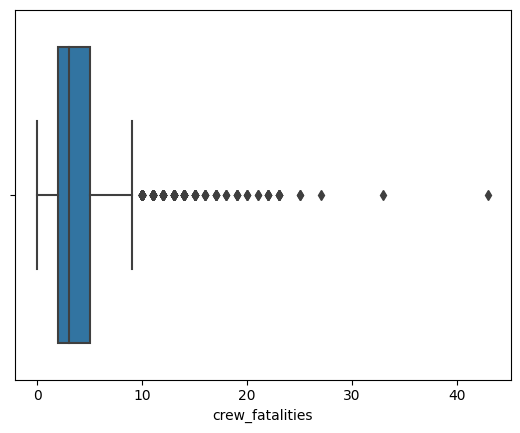

El rango intercuartil (IQR) de total_fatalities es 3.0
-2.5 9.5


,date,time,location,airline_operator,flight_no,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,summary,country,surface,category,brand,surviving_crew,survivors
6,1915-03-05,01:00:00,"Tienen, Belgium",Military - German Navy,,,Zeppelin L-8 (airship),41.0,0.0,41.0,17,0.0,17.0,Crashed into trees while attempting to land af...,Belgium,ground,military,other,24.0,24.0
10,1916-10-01,23:45:00,"Potters Bar, England",Military - German Navy,,,Zeppelin L-31 (airship),19.0,0.0,19.0,19,0.0,19.0,Shot down in flames by the British 39th Home D...,England,ground,military,other,0.0,0.0
60,1921-08-24,17:40:00,"River Humber, England",Military - Royal Airship Works,,,Royal Airship Works ZR-2 (airship),49.0,0.0,49.0,43,0.0,43.0,Crashed due to structural failure followed by ...,England,water,military,other,6.0,6.0
67,1922-04-08,13:15:00,"Pao Ting Fou, China",,,Test,,17.0,0.0,17.0,17,0.0,17.0,Aboard were all workers taking part in a fligh...,China,ground,non-military,other,0.0,0.0
102,1925-09-03,05:30:00,"Caldwell, Ohio",Military - U.S. Navy,,"Lakehurst, NJ - S.t Louis, MO",Dirigible ZR-1 Shenandoah (airship),43.0,0.0,43.0,14,0.0,14.0,The Shenandoah was flying over Southern Ohio w...,United States,ground,military,other,29.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4911,2015-07-31,11:48:00,"Near Agustin Codazzi, Colombia",Military - Colombia Air Force,,Palanquero AB -Valledupar,CASA CN-235-100,11.0,0.0,11.0,11,0.0,11.0,The military transport crashed while en route ...,Colombia,ground,military,other,0.0,0.0
4934,2016-05-19,02:49:00,175 miles off the Egyptian coast,EgyptAir,804,Paris - Cairo,Airbus A320-232,66.0,56.0,10.0,66,56.0,10.0,"The plane was en route from Paris to Cairo, fl...",Egypt,ground,non-military,Airbus,0.0,0.0
4952,2017-06-07,13:35:00,"Off Dawei, Myanmar",Military - Myanmar Air Force,,Myeik - Yangon,Shaanxi Y-8F-200W,122.0,108.0,14.0,122,108.0,14.0,The transport plane carrying military personne...,Myanmar,ground,military,other,0.0,0.0
4969,2018-04-11,08:00:00,"Boufarik AB, Algeria",Military - Algerian Air Force,,Boufarik AB - Bechar - Tindouf,Ilyushin 76-TD,257.0,247.0,10.0,257,247.0,10.0,The Algerian military plane crashed soon after...,Algeria,ground,military,Ilyushin,0.0,0.0


In [23]:
# Filtramos outliers de crew_fataltities, para apreciar mejor:
# El 25% de nuestros datos inferiorioes a la media. -2.5 
# La media que es el 50% de nuestros datos. El rango intercuartil (IQR) de total_fatalities es 3.0 entre -2.5 9.5
# El otro 25% de nuestors datos que estan por encima de la media. 9.5

sns.boxplot(data = df_EDA, x = 'crew_fatalities')
plt.savefig(r'C:\Users\ingju\Desktop\proyect02\src\outliers3', dpi=50)
plt.show()

# IQR
Q1 = np.percentile(df_EDA['crew_fatalities'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df_EDA['crew_fatalities'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
print(f"El rango intercuartil (IQR) de total_fatalities es {IQR}")

lower_lim = Q1 - 1.5*IQR
upper_lim = Q3 + 1.5*IQR
print(lower_lim, upper_lim)

df_EDA[(df_EDA['crew_fatalities']<lower_lim) | (df_EDA['crew_fatalities']>upper_lim)]

In [24]:
# Criterio de selección crew_fatalities.
df_EDA[(df_EDA['crew_fatalities']>12)]

,date,time,location,airline_operator,flight_no,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,summary,country,surface,category,brand,surviving_crew,survivors
6,1915-03-05,01:00:00,"Tienen, Belgium",Military - German Navy,,,Zeppelin L-8 (airship),41.0,0.0,41.0,17,0.0,17.0,Crashed into trees while attempting to land af...,Belgium,ground,military,other,24.0,24.0
10,1916-10-01,23:45:00,"Potters Bar, England",Military - German Navy,,,Zeppelin L-31 (airship),19.0,0.0,19.0,19,0.0,19.0,Shot down in flames by the British 39th Home D...,England,ground,military,other,0.0,0.0
60,1921-08-24,17:40:00,"River Humber, England",Military - Royal Airship Works,,,Royal Airship Works ZR-2 (airship),49.0,0.0,49.0,43,0.0,43.0,Crashed due to structural failure followed by ...,England,water,military,other,6.0,6.0
67,1922-04-08,13:15:00,"Pao Ting Fou, China",,,Test,,17.0,0.0,17.0,17,0.0,17.0,Aboard were all workers taking part in a fligh...,China,ground,non-military,other,0.0,0.0
102,1925-09-03,05:30:00,"Caldwell, Ohio",Military - U.S. Navy,,"Lakehurst, NJ - S.t Louis, MO",Dirigible ZR-1 Shenandoah (airship),43.0,0.0,43.0,14,0.0,14.0,The Shenandoah was flying over Southern Ohio w...,United States,ground,military,other,29.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4735,2009-07-15,11:33:00,"Near Qazvin, Iran",Caspian Airlines,RV-7908,"Tehran, Iran - Yerevan, Armenia",Tupolev 154M,168.0,153.0,15.0,168,153.0,15.0,The airliner crashed into a field 75 miles nor...,Iran,ground,non-military,Tupolev,0.0,0.0
4737,2009-07-24,18:20:00,"Mashad, Iran",Aria Airlines,1525,Tehran - Mashad,Ilyushin Il-62M,153.0,138.0,15.0,16,3.0,13.0,"While attempting to land, the plane skidded of...",Iran,ground,non-military,Ilyushin,2.0,137.0
4895,2014-07-17,16:19:00,"Hrabove, Ukraine",Malaysia Airlines,17,Amsterdam - Kuala Lumpur,Boeing 777-2H6ER,298.0,283.0,15.0,298,283.0,15.0,A Boeing 777-200 airliner operating as Malays...,Ukraine,ground,non-military,Boeing,0.0,0.0
4952,2017-06-07,13:35:00,"Off Dawei, Myanmar",Military - Myanmar Air Force,,Myeik - Yangon,Shaanxi Y-8F-200W,122.0,108.0,14.0,122,108.0,14.0,The transport plane carrying military personne...,Myanmar,ground,military,other,0.0,0.0


In [25]:
# Criterio de selección, si crew_aboard > crew.fatalities.

df_EDA[df_EDA['crew_aboard'] > df_EDA['crew_fatalities']]


,date,time,location,airline_operator,flight_no,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,summary,country,surface,category,brand,surviving_crew,survivors
0,1908-09-17,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,,Demonstration,Wright Flyer III,2.0,1.0,1.0,1,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",United States,ground,military,Wright Brothers,1.0,1.0
1,1909-09-07,17:18:00,"Juvisy-sur-Orge, France",,,Air show,Wright Byplane,1.0,0.0,1.0,1,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...,France,ground,non-military,Wright Brothers,1.0,0.0
6,1915-03-05,01:00:00,"Tienen, Belgium",Military - German Navy,,,Zeppelin L-8 (airship),41.0,0.0,41.0,17,0.0,17.0,Crashed into trees while attempting to land af...,Belgium,ground,military,other,24.0,24.0
30,1919-10-20,16:55:00,"English Channel off Forkstone, Kent",Aircraft Transport and Travel,,,De Havilland DH-4,0.0,0.0,1.0,0,0.0,0.0,Crashed into the sea while attempting to land ...,other,water,non-military,De Havilland,1.0,0.0
37,1920-05-12,16:55:00,"Oskaloosa, Iowa",US Aerial Mail Service,,,De Havilland DH-4,2.0,1.0,1.0,1,1.0,0.0,"In worsening weather conditions, the pilot los...",United States,ground,non-military,De Havilland,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4990,2019-10-04,07:29:00,"Lviv, Ukraine",Ukraine Air Alliance,4050,Vigo - Lviv - Istanbul,Antonov An-12BK,8.0,1.0,7.0,5,1.0,4.0,"The chartered cargo plane, planning to stop fo...",Ukraine,ground,non-military,Antonov,3.0,3.0
4992,2019-12-27,07:22:00,"Almaty, Kazakhstan",Bek Air,Z92100,Almaty - Nursultan Nazabavev,Fokker 100,98.0,95.0,3.0,12,11.0,1.0,"While taking off, the tail of the plane struck...",Kazakhstan,ground,non-military,Fokker,2.0,86.0
4995,2020-02-05,18:19:00,"Istanbul, Turkey",Pegasus Airlines,PC2193,Izmir - Istanbul,Boeing 737-86J,177.0,171.0,6.0,3,3.0,0.0,While landing duriing high winds and heavey ra...,Turkey,ground,non-military,Boeing,6.0,174.0
4998,2020-08-07,19:14:00,"Calicut, India",Air India Exppress,IX344,Dubai - Calicut,Boeing 737-8HG,190.0,184.0,6.0,20,18.0,2.0,The flight IX344 suffered a runway excursion w...,India,ground,non-military,Boeing,4.0,170.0


In [26]:
df_EDA = df_EDA

#### Gráficos de barras.

In [27]:
#Identificamos columnas catégoricas
categorical_data = df_EDA.select_dtypes(exclude=[np.number])
print('Columnas catégoricas:\n', list(categorical_data.columns))

Columnas catégoricas:
 ['date', 'time', 'location', 'airline_operator', 'flight_no', 'route', 'aircraft_type', 'summary', 'country', 'surface', 'category', 'brand']


#### Metricas.

#### Accidentes.

#### ¿Cuántos accidentes estamos analizando?
* la cantidad de accidentes analizada en el dataframe es de: 4770.
* Observando la dimencion del dataframe.
  * Tenemos 4770 filas y 23 columnas, para trabajar.


In [28]:
print('La cantidad de accidentes analizada en el dataframe es de: ', df_EDA.shape[0])

La cantidad de accidentes analizada en el dataframe es de:  4770


In [29]:
# Observando la dimencion del dataframe.
df_EDA.shape

(4770, 20)

In [30]:
df_EDA = df_EDA

#### ¿Cuál es el país con mayor cantidad de accidentes?
* Filtramos los datos para excluir la categoría other de country.
* Observamos los valores en una tabla.
  * Estados Unidos es el país con mayor cantidad de accidentes históricos.

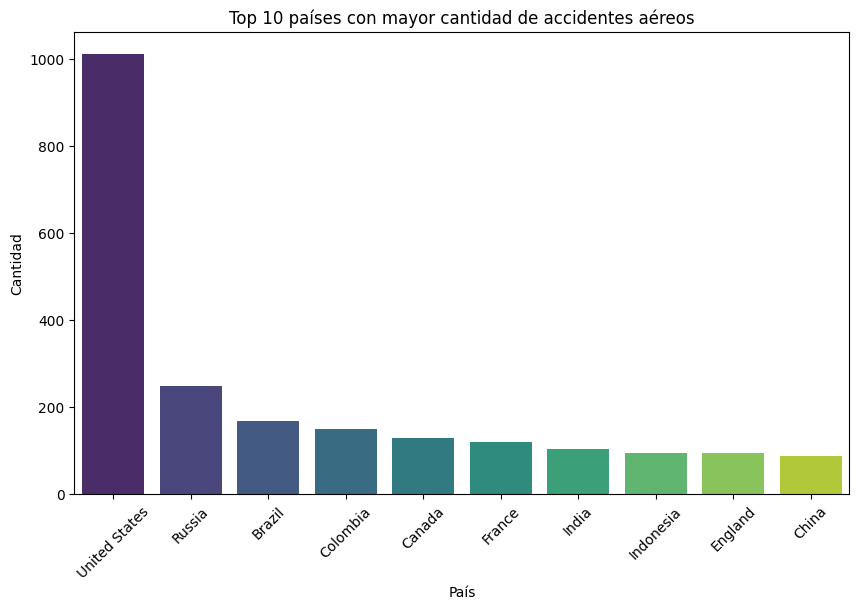

In [31]:
# Filtramos los datos para excluir la categoría other de country.
filtered_data = df_EDA[df_EDA['country'] != 'other']

# Calculamos el recuento de accidentes por país (tomamos los 10 más representativos)
country_counts = filtered_data['country'].value_counts().head(10)

# Creamos un DataFrame con los datos de recuento
top_countries = pd.DataFrame({'Country': country_counts.index, 'Accident Count': country_counts.values})

# Creamos el gráfico de barras utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Accident Count', data=top_countries, palette='viridis')
plt.title('Top 10 países con mayor cantidad de accidentes aéreos')
plt.xlabel('País')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.savefig(r'C:\Users\ingju\Desktop\proyect02\src\barras1', dpi=50)
plt.show()

In [32]:
# Observamos los valores, Estados Unidos es el país con mayor cantidad de accidentes históricos.
top_countries

,Country,Accident Count
0,United States,1011
1,Russia,250
2,Brazil,169
3,Colombia,150
4,Canada,129
5,France,120
6,India,104
7,Indonesia,95
8,England,94
9,China,87


In [33]:
df_EDA = df_EDA

#### ¿Cuál es la aerolínea con mayor cantidad de accidentes?
* Calculamos el recuento de accidentes por aerolinea (tomamos las 10 más representativos).
* Observamos los valores en una tabla.
  * En el gráfico podemos observar que Aeroflot tiene la mayor cantidad de accidentes aéreos.

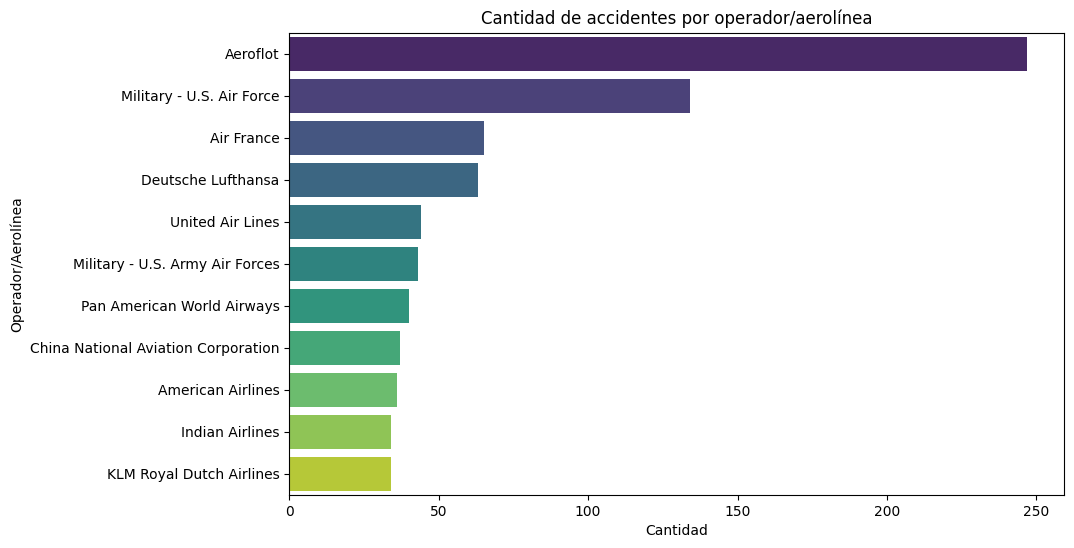

In [34]:
# Calculamos el recuento de accidentes por aerolinea (tomamos las 10 más representativos).
operator_counts = df_EDA['airline_operator'].value_counts().head(11)

# Creamos un DataFrame con los datos de recuento
top_operators = pd.DataFrame({'Operator': operator_counts.index, 'Accident Count': operator_counts.values})

# Creamos el gráfico de columnas horizontales utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Accident Count', y='Operator', data=top_operators, palette='viridis')
plt.title('Cantidad de accidentes por operador/aerolínea')
plt.xlabel('Cantidad')
plt.ylabel('Operador/Aerolínea')
plt.savefig(r'C:\Users\ingju\Desktop\proyect02\src\barras2', dpi=50)
plt.show()

In [35]:
# Observamos los valores.En el gráfico podemos observar que Aeroflot tiene la mayor cantidad de accidentes aéreos.
top_operators

,Operator,Accident Count
0,Aeroflot,247
1,Military - U.S. Air Force,134
2,Air France,65
3,Deutsche Lufthansa,63
4,United Air Lines,44
5,Military - U.S. Army Air Forces,43
6,Pan American World Airways,40
7,China National Aviation Corporation,37
8,American Airlines,36
9,Indian Airlines,34


In [36]:
df_EDA = df_EDA

#### ¿Cuál es la aeronave con mayor cantidad de accidentes?
* Calculamos el recuento de accidentes por tipo de aeronave (tomamos las 10 más representativas).
  * Observamos que el Douglas DC-3 es la aeronave con mayor cantidad de accidentes.
* Observamos los valores en una tabla.

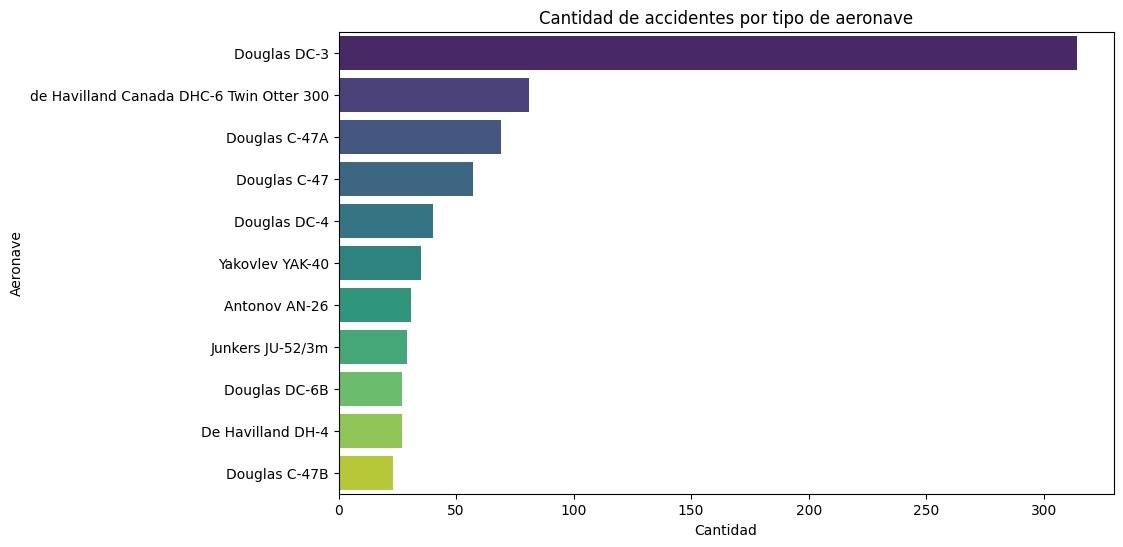

In [37]:
# Calculamos el recuento de accidentes por tipo de aeronave (tomamos las 10 más representativas).
# Observamos que el Douglas DC-3 es la aeronave con mayor cantidad de accidentes.
operator_counts = df_EDA['aircraft_type'].value_counts().head(11)

# Creamos un DataFrame con los datos de recuento 
top_aircrafts = pd.DataFrame({'Aircraft': operator_counts.index, 'Accident Count': operator_counts.values})

# Creamos el gráfico de columnas horizontales utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Accident Count', y='Aircraft', data=top_aircrafts, palette='viridis')
plt.title('Cantidad de accidentes por tipo de aeronave')
plt.xlabel('Cantidad')
plt.ylabel('Aeronave')
plt.savefig(r'C:\Users\ingju\Desktop\proyect02\src\barras3', dpi=50)
plt.show()

In [38]:
# Observamos los valores.
top_aircrafts

,Aircraft,Accident Count
0,Douglas DC-3,314
1,de Havilland Canada DHC-6 Twin Otter 300,81
2,Douglas C-47A,69
3,Douglas C-47,57
4,Douglas DC-4,40
5,Yakovlev YAK-40,35
6,Antonov AN-26,31
7,Junkers JU-52/3m,29
8,Douglas DC-6B,27
9,De Havilland DH-4,27


In [39]:
df_EDA = df_EDA

#### ¿Cuál es la marca de aeronave con mayor cantidad de accidentes?
* Calculamos el recuento de accidentes por marca (tomamos las 10 más representativas).
  * McDonnell Douglas es la marca con mas accidentes.

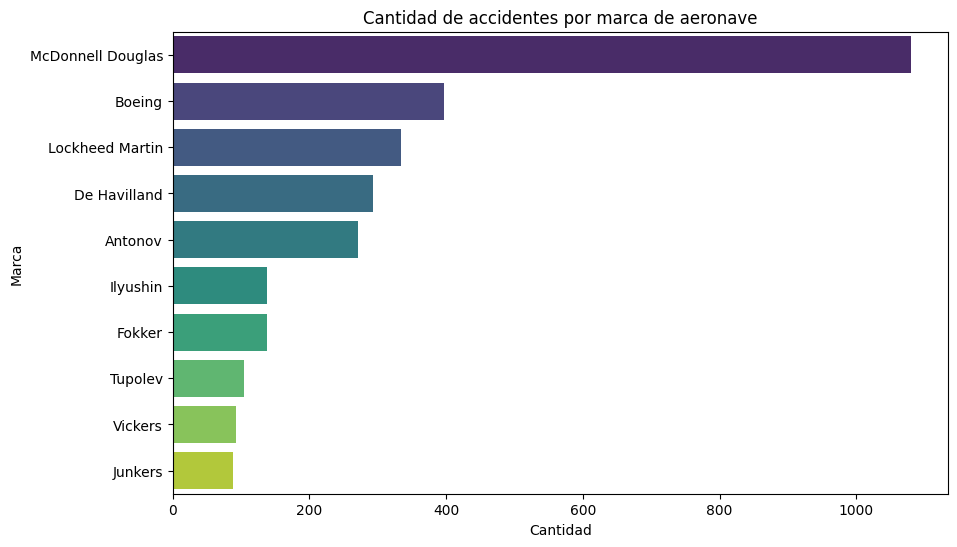

In [40]:
# Calculamos el recuento de accidentes por marca (tomamos las 15 más representativas).
# Podemos decir que se mantiene el patrón y que los aviones Douglas resultaron a lo largo de la historia los mas siniestrables. Pero...
# El fabricante de aviones Douglas Aircraft Company, conocido comúnmente como Douglas, dejó de existir como entidad independiente en 1967. 
# En ese año, se fusionó con McDonnell Aircraft Corporation para formar McDonnell Douglas Corporation. 
# A su vez, McDonnell Douglas fue adquirida por The Boeing Company en 1997.'''
operator_counts = df_EDA['brand'].value_counts().head(11)

# Filtrar 'other' del recuento
operator_counts = operator_counts[operator_counts.index != 'other']

# Creamos un DataFrame con los datos de recuento
top_brands = pd.DataFrame({'Brand': operator_counts.index, 'Accident Count': operator_counts.values})

# Creamos el gráfico de columnas horizontales utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Accident Count', y='Brand', data=top_brands, palette='viridis')
plt.title('Cantidad de accidentes por marca de aeronave')
plt.xlabel('Cantidad')
plt.ylabel('Marca')
plt.savefig(r'C:\Users\ingju\Desktop\proyect02\src\barras4', dpi=50)
plt.show()

In [41]:
# Observamos los valores.
top_brands

,Brand,Accident Count
0,McDonnell Douglas,1080
1,Boeing,397
2,Lockheed Martin,334
3,De Havilland,293
4,Antonov,271
5,Ilyushin,138
6,Fokker,138
7,Tupolev,104
8,Vickers,93
9,Junkers,88


In [42]:
df_EDA = df_EDA

#### ¿Qué categoría posee mayor cantidad de accidentes?
* Calculamos el recuento de accidentes por categoría.
  * Observamos que los vuelos no militares poseen mayor cantidad de accidentes a lo largo de la historia.

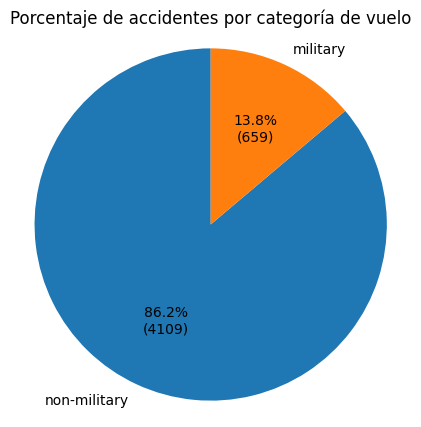

In [43]:
# Calculamos el recuento de accidentes por categoría.
# Observamos que los vuelos no militares poseen mayor cantidad de accidentes a lo largo de la historia.
category_counts = df_EDA['category'].value_counts()

# Creamos el gráfico circular
plt.figure(figsize=(5, 5))
plt.pie(category_counts, labels=category_counts.index, autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100*category_counts.sum())})', startangle=90)
plt.title('Porcentaje de accidentes por categoría de vuelo')
plt.axis('equal')
plt.savefig(r'C:\Users\ingju\Desktop\proyect02\src\past1', dpi=50)
plt.show()

In [44]:
# Observamos los valores.
category_counts

category
non-military    4110
military         660
Name: count, dtype: int64

In [45]:
df_EDA = df_EDA

#### Fatalidades.

#### ¿Cual es el indice de vuelos con mayor número de fatalidades en la tripulación?
* Obtenemos el índice del vuelo con mayor número de fatalidades en tripulación.

In [46]:
# Obtenemos el índice del vuelo con mayor número de fatalidades en tripulación.
indice_max_fatalidades = df_EDA['crew_fatalities'].idxmax()
# Obtenemos el número de vuelo, la descripción de lo sucedido y el número de fatalidades correspondientes
num_vuelo_max_fatalidades = df_EDA.loc[indice_max_fatalidades, 'flight_no']
descripcion_suceso_max_fatalidades = df_EDA.loc[indice_max_fatalidades, 'surviving_crew']
num_fatalidades_max_fatalidades = df_EDA.loc[indice_max_fatalidades, 'crew_fatalities']
operador_max_fatalidades = df_EDA.loc[indice_max_fatalidades, 'airline_operator']
# Imprimimos los resultados
print("Número de vuelo con mayor número de fatalidades:", num_vuelo_max_fatalidades)
print("Operador involucrado:", operador_max_fatalidades)
print("Número de fatalidades:", num_fatalidades_max_fatalidades)
print("Descripción de lo sucedido:", descripcion_suceso_max_fatalidades)

Número de vuelo con mayor número de fatalidades: 
Operador involucrado: Military - Royal Airship Works
Número de fatalidades: 43.0
Descripción de lo sucedido: 6.0


#### ¿Cuál fue el vuelo con mayor fatalidad y qué sucedió en el mismo?
* Obtenemos el índice del vuelo con mayor número de fatalidades.

In [47]:
# Obtenemos el índice del vuelo con mayor número de fatalidades
indice_max_fatalidades = df_EDA['total_fatalities'].idxmax()
# Obtenemos el número de vuelo, la descripción de lo sucedido y el número de fatalidades correspondientes
num_vuelo_max_fatalidades = df_EDA.loc[indice_max_fatalidades, 'flight_no']
descripcion_suceso_max_fatalidades = df_EDA.loc[indice_max_fatalidades, 'summary']
num_fatalidades_max_fatalidades = df_EDA.loc[indice_max_fatalidades, 'total_fatalities']
operador_max_fatalidades = df_EDA.loc[indice_max_fatalidades, 'airline_operator']
# Imprimimos los resultados
print("Número de vuelo con mayor número de fatalidades:", num_vuelo_max_fatalidades)
print("Operador involucrado:", operador_max_fatalidades)
print("Número de fatalidades:", num_fatalidades_max_fatalidades)
print("Descripción de lo sucedido:", descripcion_suceso_max_fatalidades)


Número de vuelo con mayor número de fatalidades: 1736/4805
Operador involucrado: Pan American World Airways / KLM
Número de fatalidades: 583
Descripción de lo sucedido: Both aircraft were diverted to Tenerife because of a bombing at Las Palmas Airport. After an extended delay,  both planes were instructed to back track up the runway. The KLM plane reached its takeoff point while the Pan Am plane was still on the runway. The Pan Am plane continued up the runway missing the taxiway turnout. There was heavy fog on the runway. The KLM plane began its takeoff roll without permission with the Pan Am plane still on the runway. The controller and Pan Am pilot each radioed a warning to the KLM plane, but were not heard because the simultaneous transmissions interfered with each other.The KLM plane hit the Pan Am plane just as it was taking off. Both planes burst into flames.  KLM 234 + 14 crew,  Pan Am 326 + 9 crew killed. All aboard the KLM plane were killed. The KLM captain was their safety o

#### ¿Qué aerolinea tuvo mayor cantidad de fatalidades?
* Agrupamos por aerolinea.
  * Aerolinea con mayor número de fatalidades es: Aeroflot.

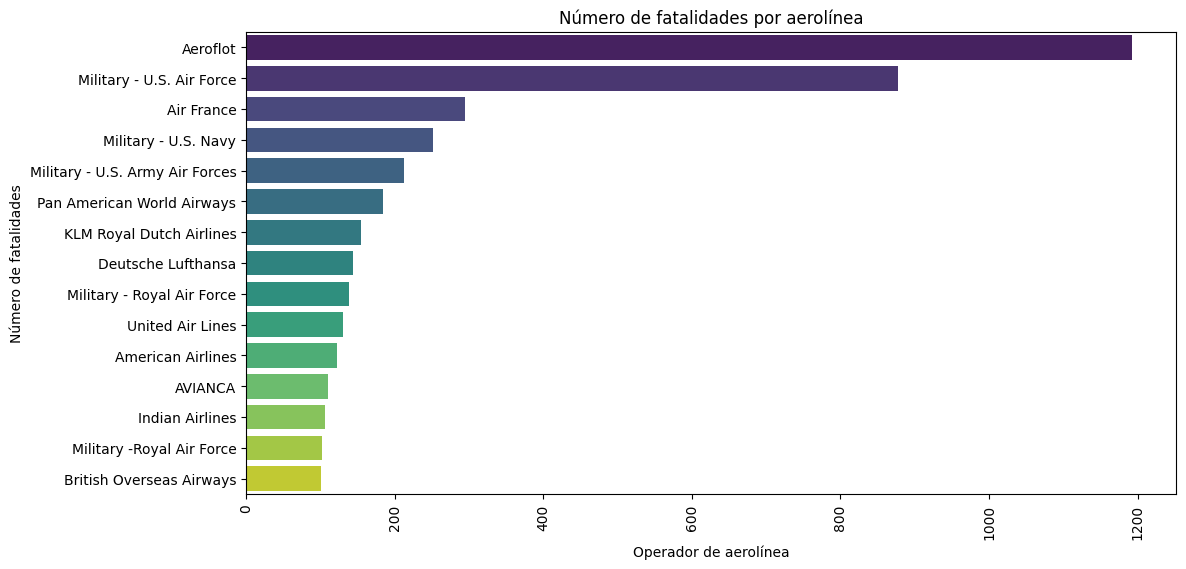

In [48]:
# Agrupamos por aerolinea.
# Aeroflot es la aerolínea con mayor cantidad de fatalidades
fatalities_by_operator = df_EDA.groupby('airline_operator')['crew_fatalities'].sum().reset_index()
# Ordenamos en forma descendente y tomamos los 15 con mayor cantidad
fatalities_by_operator = fatalities_by_operator.nlargest(15, 'crew_fatalities')
#Graficamos
plt.figure(figsize=(12, 6))
sns.barplot(y='airline_operator', x='crew_fatalities', data=fatalities_by_operator, palette='viridis')
plt.xlabel('Operador de aerolínea')
plt.ylabel('Número de fatalidades')
plt.title('Número de fatalidades por aerolínea')
plt.xticks(rotation=90)
plt.savefig(r'C:\Users\ingju\Desktop\proyect02\src\barras5', dpi=50)
plt.show()


In [49]:
# Observamos los valores.
fatalities_by_operator

,airline_operator,crew_fatalities
78,Aeroflot,1192.0
1362,Military - U.S. Air Force,877.0
184,Air France,295.0
1376,Military - U.S. Navy,252.0
1370,Military - U.S. Army Air Forces,213.0
1545,Pan American World Airways,184.0
1019,KLM Royal Dutch Airlines,155.0
712,Deutsche Lufthansa,144.0
1321,Military - Royal Air Force,138.0
2088,United Air Lines,131.0


#### ¿Qué aeronave presentó mayor cantidad de fatalidades a lo largo de los años?
* El douglas DC-3 presenta la mayor cantidad de fatalidades.

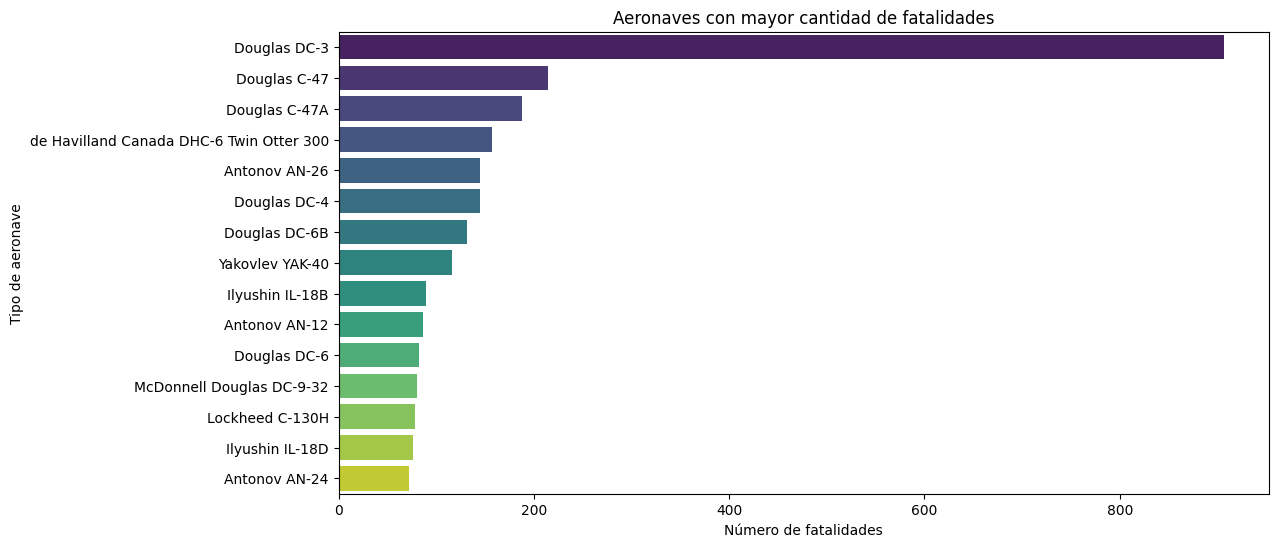

In [50]:
# Agrupamos por tipo de aeronave.
# El douglas DC-3 presenta la mayor cantidad de fatalidades.
fatalities_by_aircraft = df_EDA.groupby('aircraft_type')['crew_fatalities'].sum().reset_index()

# Ordenamos en forma descendente y tomamos los 15 con mayor cantidad
top_aircraft_fatalities = fatalities_by_aircraft.nlargest(15, 'crew_fatalities')

# Graficamos
plt.figure(figsize=(12, 6))
sns.barplot(x='crew_fatalities', y='aircraft_type', data=top_aircraft_fatalities, palette='viridis')
plt.xlabel('Número de fatalidades')
plt.ylabel('Tipo de aeronave')
plt.title('Aeronaves con mayor cantidad de fatalidades')
plt.savefig(r'C:\Users\ingju\Desktop\proyect02\src\barras6', dpi=50)
plt.show()



In [51]:
# Observamos los valores.
top_aircraft_fatalities

,aircraft_type,crew_fatalities
1094,Douglas DC-3,907.0
998,Douglas C-47,215.0
1009,Douglas C-47A,188.0
2307,de Havilland Canada DHC-6 Twin Otter 300,157.0
137,Antonov AN-26,145.0
1146,Douglas DC-4,145.0
1163,Douglas DC-6B,132.0
2270,Yakovlev YAK-40,116.0
1505,Ilyushin IL-18B,90.0
116,Antonov AN-12,86.0


In [52]:
df_EDA = df_EDA

#### ¿Qué marca tuvo la mayor cantidad de fatalidades?
* Filtramos 'other' del recuento.
  * Observamos que McDonnell Douglas presenta la mayor cantidad de fatalidades.

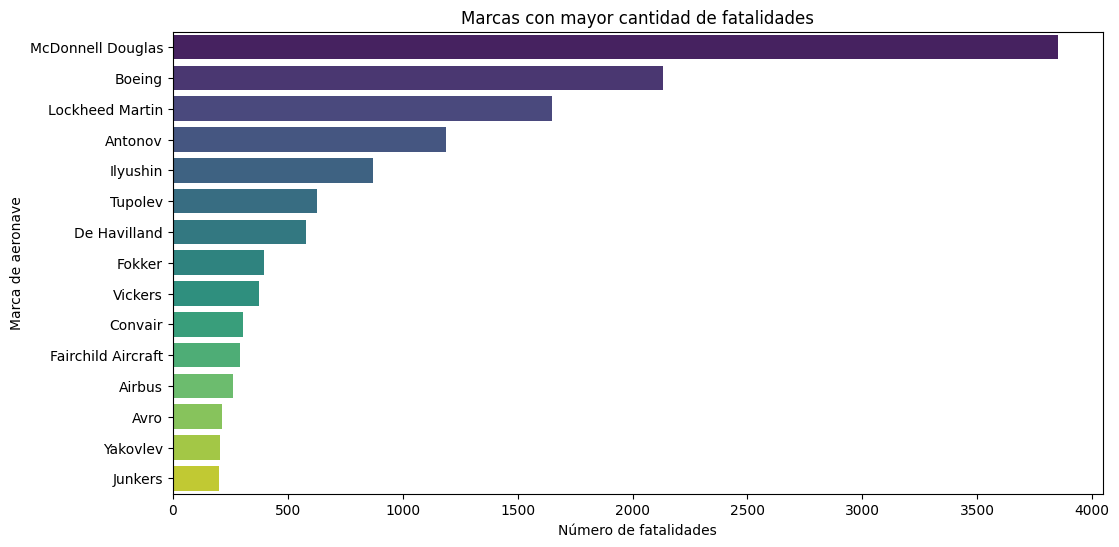

In [53]:
# Filtramos 'other' del recuento.
# Observamos que Douglas presenta la mayor cantidad de fatalidades.
data_filtered = df_EDA[df_EDA['brand'] != 'other']

# Agrupamos por tipo de marca
fatalities_by_brand = data_filtered.groupby('brand')['crew_fatalities'].sum().reset_index()

# Ordenamos en forma descendente y tomamos los 15 con mayor cantidad
top_brand_fatalities = fatalities_by_brand.nlargest(15, 'crew_fatalities')

# Graficamos
plt.figure(figsize=(12, 6))
sns.barplot(x='crew_fatalities', y='brand', data=top_brand_fatalities, palette='viridis')
plt.xlabel('Número de fatalidades')
plt.ylabel('Marca de aeronave')
plt.title('Marcas con mayor cantidad de fatalidades')
plt.savefig(r'C:\Users\ingju\Desktop\proyect02\src\barras7', dpi=50)
plt.show()


In [54]:
# Observamos los valores.
top_brand_fatalities

,brand,crew_fatalities
25,McDonnell Douglas,3853.0
8,Boeing,2131.0
24,Lockheed Martin,1648.0
1,Antonov,1189.0
21,Ilyushin,870.0
37,Tupolev,629.0
14,De Havilland,581.0
17,Fokker,399.0
38,Vickers,373.0
12,Convair,304.0


In [55]:
df_EDA = df_EDA

#### Resiliencia en Accidentes.

#### ¿Cuáles aerolíneas resultaron más seguras para la tripulación?
* Calculamos los sobrevivientes por aeronave.
  * Pese a tener la cantidad mayor de accidentes y fatalidades, Aeroflot posee el mayor número de sobrevivientes.

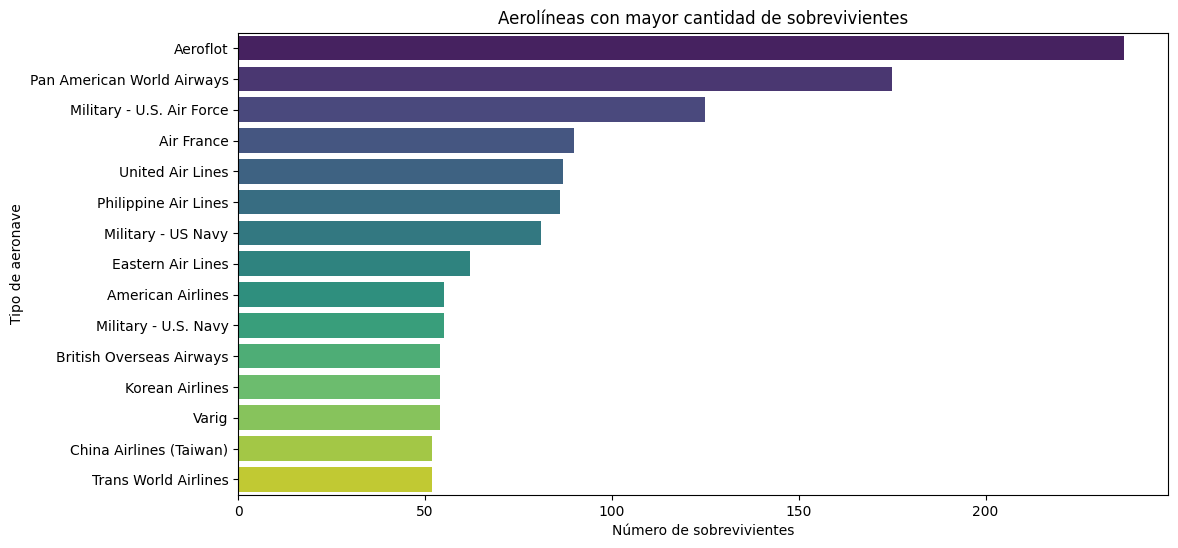

In [56]:
# Calculamos los sobrevivientes por aeronave.
# Pese a tener la cantidad mayor de accidentes y fatalidades, Aeroflot posee el mayor número de sobrevivientes.
survivors_by_airline = df_EDA.groupby('airline_operator')['surviving_crew'].sum().reset_index()

# Dejamos solamente las 15 más seguras
top_airline_survivors = survivors_by_airline.nlargest(15, 'surviving_crew')

# Graficamos
plt.figure(figsize=(12, 6))
sns.barplot(x='surviving_crew', y='airline_operator', data=top_airline_survivors, palette='viridis')
plt.xlabel('Número de sobrevivientes')
plt.ylabel('Tipo de aeronave')
plt.title('Aerolíneas con mayor cantidad de sobrevivientes')
plt.savefig(r'C:\Users\ingju\Desktop\proyect02\src\barras8', dpi=50)
plt.show()

In [57]:
# Observamos los valores.
top_airline_survivors

,airline_operator,surviving_crew
78,Aeroflot,237.0
1545,Pan American World Airways,175.0
1362,Military - U.S. Air Force,125.0
184,Air France,90.0
2088,United Air Lines,87.0
1589,Philippine Air Lines,86.0
1382,Military - US Navy,81.0
748,Eastern Air Lines,62.0
349,American Airlines,55.0
1376,Military - U.S. Navy,55.0


In [58]:
lista_nombres_aerolineas = top_airline_survivors['airline_operator'].tolist()
lista_nombres_aerolineas

['Aeroflot',
 'Pan American World Airways',
 'Military - U.S. Air Force',
 'Air France',
 'United Air Lines',
 'Philippine Air Lines',
 'Military - US Navy',
 'Eastern Air Lines',
 'American Airlines',
 'Military - U.S. Navy',
 'British Overseas Airways',
 'Korean Airlines',
 'Varig',
 'China Airlines (Taiwan)',
 'Trans World Airlines']

#### ¿Cuáles aeronaves resultaron más seguras?
* Calculamos los sobrevivientes por aeronave.

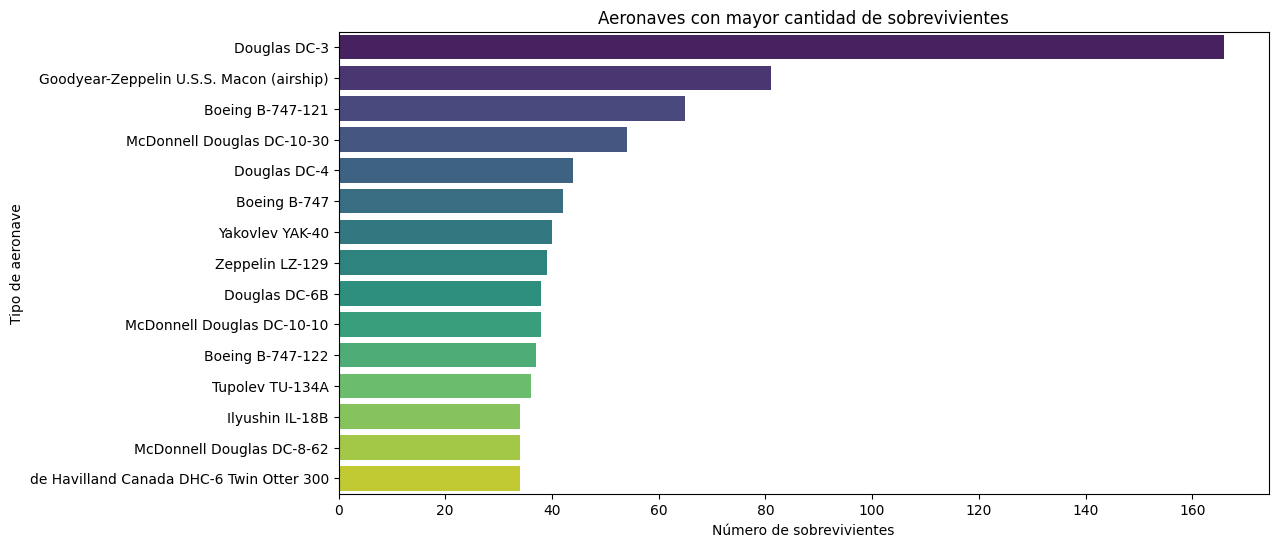

In [59]:
# Calculamos los sobrevivientes por aeronave.
# El Douglas DC-3, además de resultar el avión con mayor número de fatalidades y accidentes, es el que tiene la mayor cantidad de sobrevivientes.
survivors_by_aircraft = df_EDA.groupby('aircraft_type')['surviving_crew'].sum().reset_index()

# Dejamos solamente las 15 más seguras
top_aircraft_survivors = survivors_by_aircraft.nlargest(15, 'surviving_crew')

# Graficamos
plt.figure(figsize=(12, 6))
sns.barplot(x='surviving_crew', y='aircraft_type', data=top_aircraft_survivors, palette='viridis')
plt.xlabel('Número de sobrevivientes')
plt.ylabel('Tipo de aeronave')
plt.title('Aeronaves con mayor cantidad de sobrevivientes')
plt.savefig(r'C:\Users\ingju\Desktop\proyect02\src\barras9', dpi=50)
plt.show()


In [60]:
# Observamos los valores.
top_aircraft_survivors

,aircraft_type,surviving_crew
1094,Douglas DC-3,166.0
1384,Goodyear-Zeppelin U.S.S. Macon (airship),81.0
568,Boeing B-747-121,65.0
1803,McDonnell Douglas DC-10-30,54.0
1146,Douglas DC-4,44.0
567,Boeing B-747,42.0
2270,Yakovlev YAK-40,40.0
2280,Zeppelin LZ-129,39.0
1163,Douglas DC-6B,38.0
1802,McDonnell Douglas DC-10-10,38.0


#### ¿Qué marca resultó más segura?
* Filtramos 'other' del recuento.
  * La marca más segura resultó Boeing.

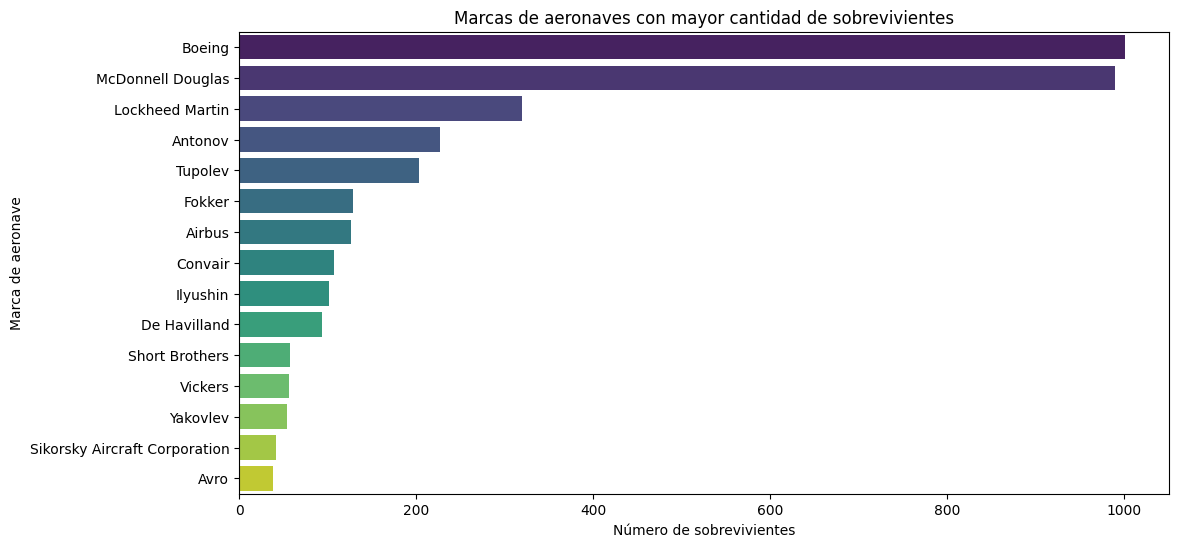

In [61]:
# Filtramos 'other' del recuento.
# La marca más segura resultó Boeing.
data_filtered = df_EDA[df_EDA['brand'] != 'other']

# Calculamos los sobrevivientes por marca
survivors_by_brand = data_filtered.groupby('brand')['surviving_crew'].sum().reset_index()

# Dejamos solamente las 15 más seguras
top_brands_survivors = survivors_by_brand.nlargest(15, 'surviving_crew')

# Graficamos
plt.figure(figsize=(12, 6))
sns.barplot(x='surviving_crew', y='brand', data=top_brands_survivors, palette='viridis')
plt.xlabel('Número de sobrevivientes')
plt.ylabel('Marca de aeronave')
plt.title('Marcas de aeronaves con mayor cantidad de sobrevivientes')
plt.savefig(r'C:\Users\ingju\Desktop\proyect02\src\barras10', dpi=50)
plt.show()

In [62]:
# Observamos los valores.
top_brands_survivors

,brand,surviving_crew
8,Boeing,1001.0
25,McDonnell Douglas,990.0
24,Lockheed Martin,320.0
1,Antonov,227.0
37,Tupolev,203.0
17,Fokker,129.0
0,Airbus,126.0
12,Convair,107.0
21,Ilyushin,102.0
14,De Havilland,94.0


In [63]:
lista_nombres_marcas = top_brands_survivors['brand'].tolist()
lista_nombres_marcas

['Boeing',
 'McDonnell Douglas',
 'Lockheed Martin',
 'Antonov',
 'Tupolev',
 'Fokker',
 'Airbus',
 'Convair',
 'Ilyushin',
 'De Havilland',
 'Short Brothers',
 'Vickers',
 'Yakovlev',
 'Sikorsky Aircraft Corporation',
 'Avro']

In [64]:
df_EDA = df_EDA

#### ¿Las aerolíneas más seguras tenían las marcas más seguras?
* Instanciamos el top_airline_surviviod, para despues cruzarla en una tabla.
* Instanciamos el top_brands_surviviod, para despues cruzarla en una tabla.
* Hacemos una tabla cruzada para mostrar cantidad de marcas por aerolínea.

In [65]:
#  Instanciamos el top_airline_surviviod, para despues cruzarla en una tabla.
lista_nombres_aerolineas = top_airline_survivors['airline_operator'].tolist()
lista_nombres_aerolineas

['Aeroflot',
 'Pan American World Airways',
 'Military - U.S. Air Force',
 'Air France',
 'United Air Lines',
 'Philippine Air Lines',
 'Military - US Navy',
 'Eastern Air Lines',
 'American Airlines',
 'Military - U.S. Navy',
 'British Overseas Airways',
 'Korean Airlines',
 'Varig',
 'China Airlines (Taiwan)',
 'Trans World Airlines']

In [66]:
# Instanciamos el top_brands_surviviod, para despues cruzarla en una tabla.
lista_nombres_marcas = top_brands_survivors['brand'].tolist()
lista_nombres_marcas

['Boeing',
 'McDonnell Douglas',
 'Lockheed Martin',
 'Antonov',
 'Tupolev',
 'Fokker',
 'Airbus',
 'Convair',
 'Ilyushin',
 'De Havilland',
 'Short Brothers',
 'Vickers',
 'Yakovlev',
 'Sikorsky Aircraft Corporation',
 'Avro']

In [67]:
# Hacemos una tabla cruzada para mostrar cantidad de marcas por aerolínea.
tabla_cruzada = pd.crosstab(df_EDA['airline_operator'], df_EDA['brand'], margins=True, margins_name="Total")
# Filtramos la tabla cruzada por las aerolíneas y marcas más seguras
tabla_cruzada_filtrada = tabla_cruzada.loc[lista_nombres_aerolineas, lista_nombres_marcas]
tabla_cruzada_filtrada

# Las aerolineas más seguras, históricamente tuvieron dentro de su flota Boeing y Douglas principalmente.
# Esto indica que las aerolíneas más seguras compraron las aerolíneas más seguras. 


brand,Boeing,McDonnell Douglas,Lockheed Martin,Antonov,Tupolev,Fokker,Airbus,Convair,Ilyushin,De Havilland,Short Brothers,Vickers,Yakovlev,Sikorsky Aircraft Corporation,Avro
airline_operator,,,,,,,,,,,,,,,
Aeroflot,1,3,0,64,56,0,0,0,68,0,0,0,23,0,0
Pan American World Airways,25,3,6,0,0,0,0,0,0,0,0,0,0,5,0
Military - U.S. Air Force,29,34,41,0,0,0,0,7,0,1,0,0,0,1,0
Air France,5,16,6,0,0,0,4,0,0,0,0,1,0,0,0
United Air Lines,15,25,0,0,0,0,0,1,0,0,0,2,0,0,0
Philippine Air Lines,2,13,0,0,0,5,2,0,0,2,0,0,0,0,0
Military - US Navy,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0
Eastern Air Lines,2,17,6,0,0,0,0,0,0,0,0,0,0,0,0
American Airlines,10,15,2,0,0,0,2,5,0,0,0,0,0,0,0


In [68]:
df_EDA = df_EDA

#### Análisis temporal.
* Accidentes a lo largo de los años.

#### Primer y último vuelo del dataset.
* Vuelo más antiguo:
  * Número de vuelo: 
  * Operador de la aerolínea: Military - U.S. Army
  * Fecha: 1908-09-17T00:00:00.000000000
* Vuelo más reciente:
  * Número de vuelo: 251
  * Operador de la aerolínea: Kamchatka Aviation Enterprise
  * Fecha: 2021-07-06T00:00:00.000000000

In [69]:
# Obtenemos el vuelo más antiguo
vuelo_mas_antiguo = df_EDA[df_EDA['date'] == df_EDA['date'].min()]
num_vuelo_antiguo = vuelo_mas_antiguo['flight_no'].values[0]
operador_antiguo = vuelo_mas_antiguo['airline_operator'].values[0]
fecha_antigua = vuelo_mas_antiguo['date'].values[0]

# Obtenemos el vuelo más reciente
vuelo_mas_reciente = df_EDA[df_EDA['date'] == df_EDA['date'].max()]
num_vuelo_reciente = vuelo_mas_reciente['flight_no'].values[0]
operador_reciente = vuelo_mas_reciente['airline_operator'].values[0]
fecha_reciente = vuelo_mas_reciente['date'].values[0]

# Imprimimos los resultados
print("Vuelo más antiguo:")
print("Número de vuelo:", num_vuelo_antiguo)
print("Operador de la aerolínea:", operador_antiguo)
print("Fecha:", fecha_antigua)
print()
print("Vuelo más reciente:")
print("Número de vuelo:", num_vuelo_reciente)
print("Operador de la aerolínea:", operador_reciente)
print("Fecha:", fecha_reciente)

Vuelo más antiguo:
Número de vuelo: 
Operador de la aerolínea: Military - U.S. Army
Fecha: 1908-09-17T00:00:00.000000000

Vuelo más reciente:
Número de vuelo: 251
Operador de la aerolínea: Kamchatka Aviation Enterprise
Fecha: 2021-07-06T00:00:00.000000000


#### ¿Resultan más seguros los vuelos en los últimos años?
* Podemos observar que a partir de 1908 la tendencia comenzó fuertemente alcista hasta llegar a 1946 donde tuvimos el máximo histórico
* La tendencia marcó una consolidación entre 1946 y el año 2000, con máximos entre 70 y 80
* Para finalmente comenzar una tendencia a la baja a partir de 1990
* Para los últimos años del dataset, la cantidad de accidentes se encuentra en mínimos históricos
* La media móvil de 10 años resulta un factor importante a considerar, puesto que todas las veces que hemos estado por encima de la misma, los accidentes han sido altos en cantidad
* En los últimos años los vuelos resultaron más seguros que durante mediados del siglo XX

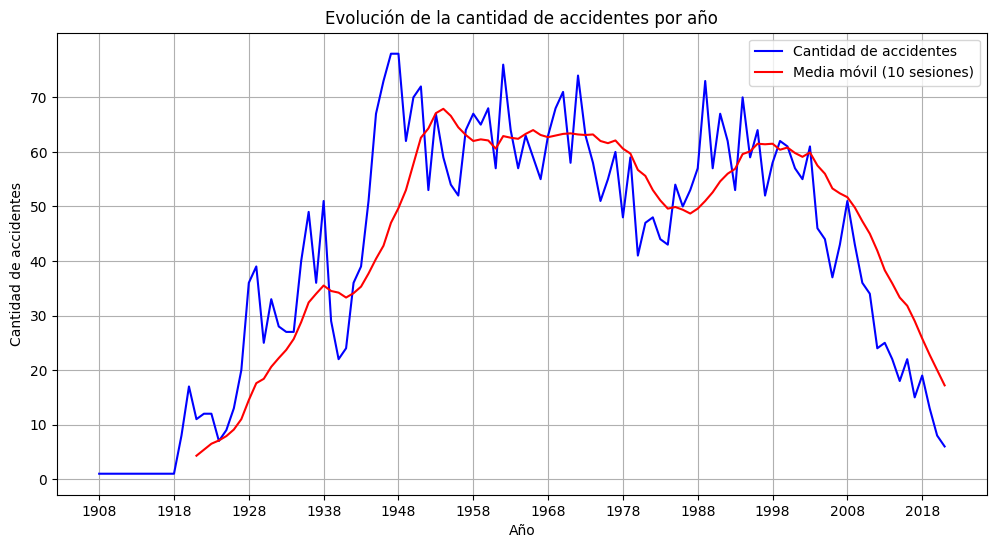

In [70]:
# Extraemos el año de la columna 'date'
df_EDA['year'] = pd.to_datetime(df_EDA['date']).dt.year

# Agrupamos por año y contamos la cantidad de accidentes
accidents_by_year = df_EDA.groupby('year').size().reset_index(name='Cantidad de accidentes')

# Calculamos la media móvil de 10 sesiones
accidents_by_year['Media móvil'] = accidents_by_year['Cantidad de accidentes'].rolling(window=10).mean()

# Creamos el gráfico de líneas
plt.figure(figsize=(12, 6))
sns.lineplot(data=accidents_by_year, x='year', y='Cantidad de accidentes', color='blue', label='Cantidad de accidentes')
sns.lineplot(data=accidents_by_year, x='year', y='Media móvil', color='red', label='Media móvil (10 sesiones)')

# Establecemos separación del eje x cada 10 años
plt.xticks(range(min(accidents_by_year['year']), max(accidents_by_year['year'])+1, 10))

# Establecemos separación del eje y cada 10 unidades
plt.yticks(range(0, max(accidents_by_year['Cantidad de accidentes'])+1, 10))

# Mostramos gridlines
plt.grid(True)

# Establecemos etiquetas de los ejes
plt.xlabel('Año')
plt.ylabel('Cantidad de accidentes')

# Establecemos título del gráfico
plt.title('Evolución de la cantidad de accidentes por año')
plt.savefig(r'C:\Users\ingju\Desktop\proyect02\src\lineal1', dpi=50)

# Mostramos el gráfico
plt.show()

# Podemos observar que a partir de 1908 la tendencia comenzó fuertemente alcista hasta llegar a 1946 donde tuvimos el máximo histórico
# La tendencia marcó una consolidación entre 1946 y el año 2000, con máximos entre 70 y 80
# Para finalmente comenzar una tendencia a la baja a partir de 1990
# Para los últimos años del dataset, la cantidad de accidentes se encuentra en mínimos históricos
# La media móvil de 10 años resulta un factor importante a considerar, puesto que todas las veces que hemos estado por encima de la misma, los accidentes han sido altos en cantidad

# En los últimos años los vuelos resultaron más seguros que durante mediados del siglo XX


In [71]:
df_EDA = df_EDA

#### ¿Cuál fue el año con mayor cantidad de accidentes?
* El año con mayor cantidad de accidentes fue 1947 con 78

In [72]:
# Agrupamos por año y contamos la cantidad de accidentes
accidents_by_year = df_EDA.groupby('year').size().reset_index(name='accident_count')

# Ordenamos el DataFrame por la columna 'Cantidad de accidentes' de forma descendente
top_10_years = accidents_by_year.sort_values(by='accident_count', ascending=False).head(10)

# Mostramos el DataFrame con el top 10 de años ordenados por cantidad de accidentes
top_10_years


# El año con mayor cantidad de accidentes fue 1947 con 78


,year,accident_count
35,1947,78
36,1948,78
50,1962,76
60,1972,74
77,1989,73
34,1946,73
39,1951,72
58,1970,71
38,1950,70
82,1994,70


In [73]:
df_EDA = df_EDA

#### ¿Cuál ha sido el mes histórico con mayor cantidad de accidentes?
* Realizamos grafico de barras.
* Mostramos resultado en una tabla.
* El mes con mayor cantidad de accidentes :
  * Diciembre con 473 accidentes.
* Descripción estadistica de mes.
  * La media de accidentes por mes está en 415

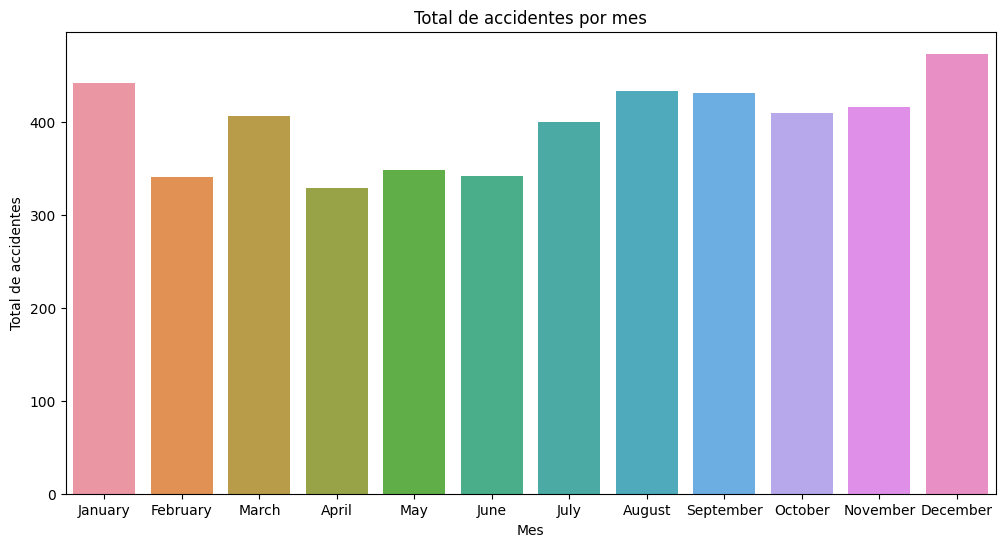

In [74]:
import calendar
# Extraemos el mes de la columna 'date'
df_EDA['month'] = pd.to_datetime(df_EDA['date']).dt.month
# Obtenemos los nombres de los meses
df_EDA['month'] = df_EDA['month'].apply(lambda x: calendar.month_name[x])
# Agrupamos por mes y contamos la cantidad de accidentes
accidents_by_month = df_EDA.groupby('month').size().reset_index(name='accident_count')
# Ordenamos los meses de forma cíclica
months_order = list(calendar.month_name)[1:]  # Lista de nombres de los meses sin el primer elemento (vacío)
accidents_by_month['month'] = pd.Categorical(accidents_by_month['month'], categories=months_order, ordered=True)
accidents_by_month = accidents_by_month.sort_values('month')

# Creamos el gráfico de barras con Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=accidents_by_month, x='month', y='accident_count')

# Establecemos etiquetas de los ejes
plt.xlabel('Mes')
plt.ylabel('Total de accidentes')

# Establecemos título en el gráfico
plt.title('Total de accidentes por mes')
plt.savefig(r'C:\Users\ingju\Desktop\proyect02\src\barras11', dpi=50)
# Mostramos el gráfico
plt.show()

In [75]:
# Mostramos resultado en una tabla.
df_month = accidents_by_month.sort_values('accident_count', ascending = False)
df_month

,month,accident_count
2,December,473
4,January,442
1,August,433
11,September,431
9,November,416
10,October,409
7,March,406
5,July,400
8,May,348
6,June,342


In [76]:
# Descripción estadistica de mes.
df_month.describe()
# La media de accidentes por mes está en 415

,accident_count
count,12.000000
mean,397.500000
std,46.740094
min,329.000000
25%,346.500000
50%,407.500000
75%,431.500000
max,473.000000


In [77]:
df_EDA = df_EDA

#### ¿Cuál ha sido el día histórico con mayor cantidad de accidentes?
* Realizamos grafico por dia.
* Mostramos resultado en tabla.
  * El día con mayores accidentes fue: Martes con 719 accidentes.
* Descripcion estadistica de días.
  * La media es de: 681 accidentes por día.

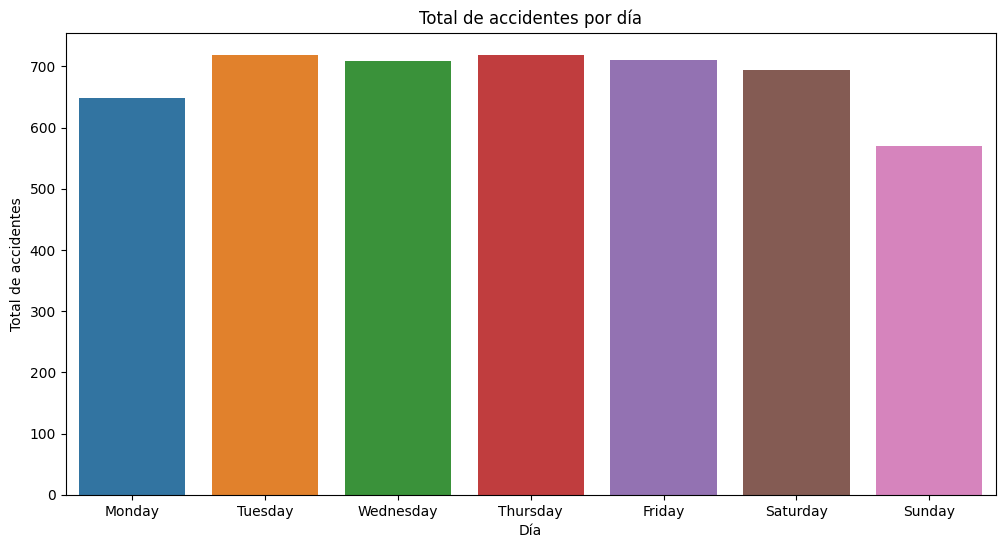

In [78]:
# Extraemos el día de la columna 'date'
df_EDA['day'] = pd.to_datetime(df_EDA['date']).dt.dayofweek

# Obtenemos los nombres de los días de la semana
df_EDA['day'] = df_EDA['day'].apply(lambda x: calendar.day_name[x])

# Agrupamos por día y contamos la cantidad de accidentes
accidents_by_day = df_EDA.groupby('day').size().reset_index(name='accident_count')

# Ordenamos los días de la semana de forma cíclica
days_order = list(calendar.day_name)
accidents_by_day['day'] = pd.Categorical(accidents_by_day['day'], categories=days_order, ordered=True)
accidents_by_day = accidents_by_day.sort_values('day')

# Creamos el gráfico de barras con Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=accidents_by_day, x='day', y='accident_count')

# Establecemos etiquetas de los ejes
plt.xlabel('Día')
plt.ylabel('Total de accidentes')

# Establecemos título del gráfico
plt.title('Total de accidentes por día')
plt.savefig(r'C:\Users\ingju\Desktop\proyect02\src\barras12', dpi=50)
# Mostramos el gráfico
plt.show()



In [79]:
# Mostramos resultado en tabla.
# El día con mayores accidentes fue: Martes con 719 accidentes.
df_day = accidents_by_day.sort_values('accident_count', ascending = False)
df_day

,day,accident_count
5,Tuesday,719
4,Thursday,719
0,Friday,711
6,Wednesday,709
2,Saturday,694
1,Monday,648
3,Sunday,570


In [80]:
# Descripcion estadistica de días.
# La media es de: 681
df_day.describe()

,accident_count
count,7.000000
mean,681.428571
std,54.999567
min,570.000000
25%,671.000000
50%,709.000000
75%,715.000000
max,719.000000


In [81]:
df_EDA = df_EDA

#### %store

In [82]:
%store df_EDA

Stored 'df_EDA' (DataFrame)
